In [2]:
import yr_weather

# Replace with your own User-Agent. See MET API Terms of Service for correct User-Agents.
headers = {
    "User-Agent": "Stedspesifikk v/0.1 jan.helge.aalbu@vegvesen.no"
}

lat = 61.98
lon = 7.33
my_client = yr_weather.Locationforecast(headers=headers)

forecast = my_client.get_forecast(lat, lon)

forecast_now = forecast.now()
next_6_hrs = forecast_now.next_6_hours
expected_temp = next_6_hrs.details.air_temperature
#print(max_temp)
#forecast_12_hrs = forecast.next_12_hours()



In [3]:
import metno

In [4]:
params = {
    "lat": 61.98,
    "lon": 7.33
}

In [17]:
data = metno.MetWeatherData(params)

RuntimeError: This event loop is already running

In [5]:
import pytz
from aiohttp import ClientSession


In [6]:


# Define your location's coordinates
urlparams = {
    'lat': '59.91',  # Latitude
    'lon': '10.75',  # Longitude
}

# Create an asynchronous web session
async with ClientSession() as session:
    met_weather_data = metno.MetWeatherData(urlparams, websession=session)

In [7]:
met_weather_data.fetching_data()

<coroutine object MetWeatherData.fetching_data at 0x000001FC18EC3AB0>

In [8]:


# Get current weather
current_weather = met_weather_data.get_current_weather()

# Get forecast (for example, hourly for the next 24 hours)
forecast_data = met_weather_data.get_forecast(pytz.timezone('Europe/Oslo'), hourly=True, range_start=1, range_stop=24)

In [9]:
print(forecast_data)

[]


In [10]:
import asyncio
from aiohttp import ClientSession
from metno import MetWeatherData  # Replace 'your_module' with the actual module name

async def main():
    # Define your location's coordinates
    urlparams = {'lat': '61.98', 'lon': '10.75'}  # Example coordinates

    # Create an asynchronous web session and fetch weather data
    async with ClientSession() as session:
        met_weather_data = MetWeatherData(urlparams, websession=session)
        await met_weather_data.fetching_data()

        # Get current weather or forecast
        current_weather = met_weather_data.get_current_weather()
        print(current_weather)
        # Add more processing as needed...

# Run the main coroutine
asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [14]:
from metno_locationforecast import Place, Forecast
user_agent = "Stedspesifikk v/0.1 jan.helge.aalbu@vegvesen.no"

In [15]:
kvitenova = Place("New York", 61.98, 7.33, 10)

In [16]:
kvitenova_forecast = Forecast(kvitenova, user_agent)

In [17]:
kvitenova_forecast.update()

'Data-Modified'

In [46]:
from pprint import pprint
import matplotlib.pyplot as plt

In [22]:
print(kvitenova_forecast)

Forecast for New York:
	Forecast between 2023-12-11 09:00:00 and 2023-12-11 10:00:00:
		air_pressure_at_sea_level: 1004.9hPa
		air_temperature: -1.8celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.5%
		wind_from_direction: 118.6degrees
		wind_speed: 6.3m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 10:00:00 and 2023-12-11 11:00:00:
		air_pressure_at_sea_level: 1005.0hPa
		air_temperature: -1.7celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.3%
		wind_from_direction: 115.9degrees
		wind_speed: 6.2m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 11:00:00 and 2023-12-11 12:00:00:
		air_pressure_at_sea_level: 1005.0hPa
		air_temperature: -1.7celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.2%
		wind_from_direction: 106.3degrees
		wind_speed: 6.0m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 12:00:00 and 2023-12-11 13:00:00:
		air_pressure_at_sea_level: 1005.1hPa
		air_temperature: -1.4celsius
		cloud_area_fracti

In [23]:
vars(kvitenova_forecast.data).keys()

dict_keys(['last_modified', 'expires', 'updated_at', 'units', 'intervals'])

In [35]:
pprint(kvitenova_forecast.json_string)

('{"status_code":200,"headers":{"Server": "nginx/1.18.0 (Ubuntu)", "Date": '
 '"Mon, 11 Dec 2023 09:53:10 GMT", "Content-Type": "application/json", '
 '"Content-Length": "2555", "Connection": "keep-alive", "Expires": "Mon, 11 '
 'Dec 2023 10:24:44 GMT", "Last-Modified": "Mon, 11 Dec 2023 09:53:10 GMT", '
 '"X-Backend-Host": "b_157_249_76_16_loc", "Access-Control-Allow-Origin": "*", '
 '"Access-Control-Allow-Methods": "GET", "Access-Control-Allow-Headers": '
 '"Origin", "Content-Encoding": "gzip", "Vary": "Accept, Accept-Encoding", '
 '"X-Varnish": "473995937", "Age": "0", "Via": "1.1 varnish (Varnish/7.0)", '
 '"Accept-Ranges": '
 '"bytes"},"data":{"type":"Feature","geometry":{"type":"Point","coordinates":[7.33,61.98,10]},"properties":{"meta":{"updated_at":"2023-12-11T09:37:17Z","units":{"air_pressure_at_sea_level":"hPa","air_temperature":"celsius","cloud_area_fraction":"%","precipitation_amount":"mm","relative_humidity":"%","wind_from_direction":"degrees","wind_speed":"m/s"}},"timeser

In [55]:
tidspunkt_temp = []
tidspunkt_nedbor = []
temperatur = []
nedbor = []
for i in kvitenova_forecast.data.intervals:
    print(i.variables.keys())
    try:
        temperatur.append(i.variables['air_temperature'].value)
        tidspunkt_temp.append(i.start_time)
    except:
        continue
    try:
        nedbor.append(i.variables['precipitation_amount'].value)
        tidspunkt_nedbor.append(i.start_time)
    except:
        continue




dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(

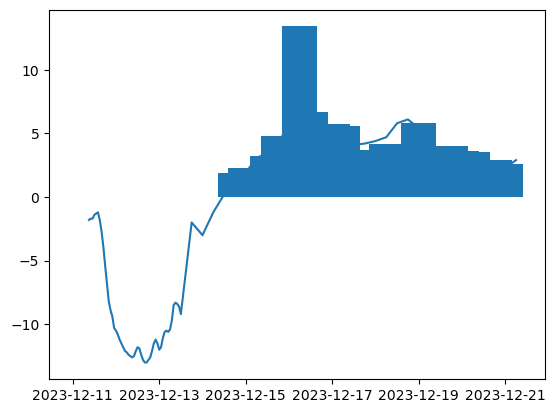

In [59]:
plt.plot(tidspunkt_temp, temperatur)
plt.bar(tidspunkt_nedbor, nedbor)
plt.show()

In [60]:
from regobslib import *

In [61]:
connection = Connection(prod=True)
results = connection.search(SnowRegistration, regions=[SnowRegion.OFOTEN], observation_types=[Weather])

print(f"Length of results: {len(results)}\n")

print("First result")
print(results[0])

print("\nIterates over results")
for result in results:
    print(f"Id: {result.id}, Observer: {result.observer.nickname}, Date: {result.obs_time}")

Length of results: 3147

First result
{'avalanche_activities': [{'avalanche_type': 0,
                           'comment': None,
                           'distribution': 0,
                           'elevation': {'elev_max': 0,
                                         'elev_min': 0,
                                         'format': 0},
                           'end': None,
                           'expositions': None,
                           'quantity': <Quantity.NO_ACTIVITY: 1>,
                           'sensitivity': 0,
                           'size': 0,
                           'start': None}],
 'avalanche_obs': None,
 'avalanche_problems': [],
 'compression_tests': [],
 'danger_assessment': {'comment': None,
                       'danger_assessment': 'Liten skredfare (vurdert fra '
                                            'veg). Lite snø . ',
                       'danger_development': 'Uforandret skredfare neste '
                                           

KeyboardInterrupt: 

In [71]:
from frost2df import obs2df, frost2df
client_id = '382037b2-96a7-4bb7-adfe-5ccb4986aa46'
client_secret = 'b51c5973-07ce-4b79-a71f-a817662cc9b3'
stasjonsid = 58705

In [76]:
from datetime import datetime, timedelta

In [77]:
now = datetime.now().replace(minute=0, second=0, microsecond=0)

# Get a date a certain number of days earlier
days_earlier = 10  # Change this to the number of days you want
earlier_date = now - timedelta(days=days_earlier)

# Convert the dates to strings in the format 'YYYY-MM-DDTHH:MM:SS'
now_str = now.isoformat()
earlier_date_str = earlier_date.isoformat()

print('Now:', now_str)
print('Earlier date:', earlier_date_str)

Now: 2023-12-11T16:00:00
Earlier date: 2023-12-01T16:00:00


In [75]:

parameters = {
    'sources':'SN' + str(stasjonsid),
    'elements': 'air_temperature',
    'referencetime': earlier_date_str + '/' + now_str,
    'timeoffsets': 'PT0H'
}
display(obs2df(parameters=parameters, verbose=True))
    

https://frost.met.no/observations/v0.jsonld?sources=SN58705&elements=air_temperature&referencetime=2023-04-03%2F2024-04-03&timeoffsets=PT0H


,sourceId,elementId,referenceTime,value,unit,qualityCode,timeOffset,timeResolution,level.value
0,SN58705:0,air_temperature,2023-04-03 00:00:00+00:00,-17.7,degC,6,PT0H,PT10M,2
1,SN58705:0,air_temperature,2023-04-03 01:00:00+00:00,-17.6,degC,6,PT0H,PT10M,2
2,SN58705:0,air_temperature,2023-04-03 02:00:00+00:00,-17.7,degC,6,PT0H,PT10M,2
3,SN58705:0,air_temperature,2023-04-03 03:00:00+00:00,-17.8,degC,6,PT0H,PT10M,2
4,SN58705:0,air_temperature,2023-04-03 04:00:00+00:00,-17.8,degC,6,PT0H,PT10M,2
...,...,...,...,...,...,...,...,...,...
33994,SN58705:0,air_temperature,2023-12-11 13:20:00+00:00,-12.5,degC,0,PT0H,PT10M,2
33995,SN58705:0,air_temperature,2023-12-11 13:40:00+00:00,-12.0,degC,0,PT0H,PT10M,2
33996,SN58705:0,air_temperature,2023-12-11 13:50:00+00:00,-12.3,degC,0,PT0H,PT10M,2
33997,SN58705:0,air_temperature,2023-12-11 14:00:00+00:00,-12.0,degC,0,PT0H,PT10M,2


In [72]:
available = frost2df('observations/availableTimeSeries', {'sources': 'SN58705'}).sort_values('validFrom')

In [73]:
print(available)

     sourceId                 validFrom timeOffset timeResolution  \
10  SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
1   SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
18  SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
17  SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
15  SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
9   SN58705:0  2013-10-09T00:00:00.000Z       PT0H          PT10M   
5   SN58705:0  2014-01-15T00:00:00.000Z       PT0H            P1D   
6   SN58705:0  2014-01-15T00:00:00.000Z       PT0H            P1D   
14  SN58705:0  2014-01-15T00:00:00.000Z       PT0H            P1D   
11  SN58705:0  2014-01-15T00:00:00.000Z       PT0H            P1D   
16  SN58705:0  2015-11-16T00:00:00.000Z       PT0H           PT1H   
0   SN58705:0  2015-11-16T00:00:00.000Z       PT0H          PT10M   
20  SN58705:0  2015-11-26T00:00:00.000Z       PT0H          PT10M   
13  SN58705:0  2016-10-26T00:00:00